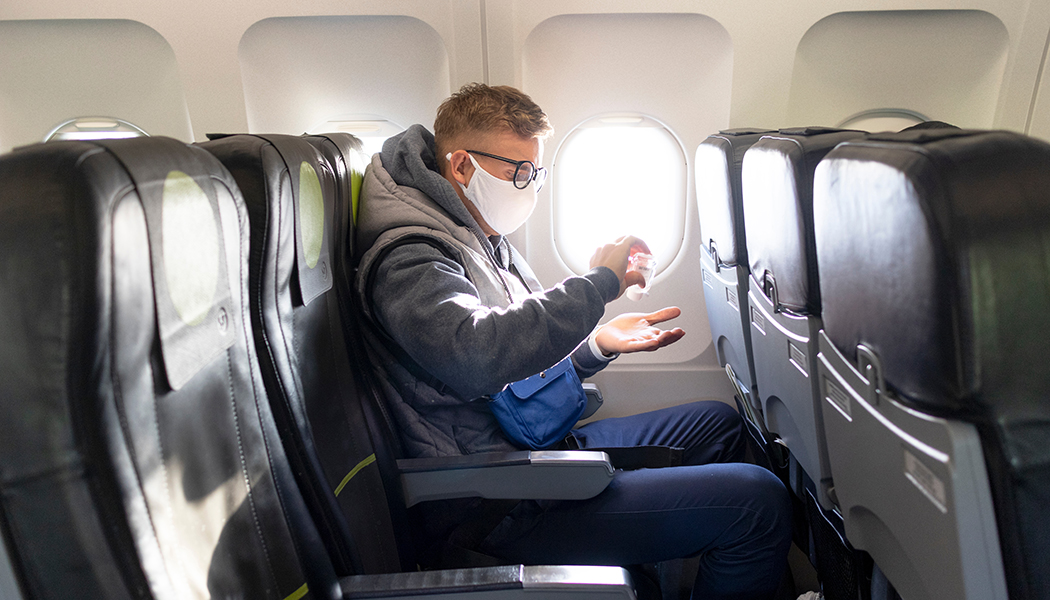

In [1]:
from IPython.display import Image
Image("20200626-Covid-Blog.jpg",width=1000,height=1000)

The **COVID-19** pandemic has affected the world over with every part of society being hit and hurt. The pandemic has
led to many closures of of day to day freedoms and activities we as people enjoy. One such restriction has been in the
tourism industry which has been hit with travel restrictions. As result the tourism industry has been hit severely and
also the airline industry which has expirienced much retrenchments. 

However, as indistries begin to open up over time
tourism will begin to recover rather sooner then later. Personally I can't wait to begin travelling again and I thought
it would be fun to locate various places throughout the world to visit when things do open up. For the notebook
our focus will be maily in European cities with the exception of dubai.

**LETS WITNESS THE POWER OF PYTHON TO HELP US NAVIGATE ONCE BORDERS OPEN UP** 

## Libraries 

In [2]:
import pandas as pd 
from IPython.display import display
from ipyleaflet import Map, Marker, MarkerCluster
import pandas as pd
import requests
from xml.etree import ElementTree
import numpy as np
import folium
from folium.plugins import MarkerCluster


In [3]:
Destination = pd.read_csv('International.csv')

In [4]:
## First five rows
Destination.head()

,Unnamed: 0,location,lat,lng,name,subCategory
0,0,Amsterdam,52.356347,4.997105,Kos,Hotel
1,1,Amsterdam,52.355473708753,4.9932861328125,Hawaijburg,Resort
2,2,Amsterdam,52.382517,4.791104,Perfect House In Amsterdam!,Bed & Breakfast
3,3,Amsterdam,52.350272159742,4.7806079636587,Huize Verel,Resort
4,4,Amsterdam,52.38013065,4.80258218,d' R.C : Dream Academy,Resort


In [5]:
## Last five rows
Destination.tail()

,Unnamed: 0,location,lat,lng,name,subCategory
463021,32807,43.848271,restaurant,Tuscany,11.173788,NaN
463022,32808,43.934606,restaurant,Tuscany,11.01911,NaN
463023,32809,43.809678,restaurant,Tuscany,10.483349,NaN
463024,32810,43.317915,restaurant,Tuscany,11.330549,NaN
463025,32811,43.34523,restaurant,Tuscany,11.504688,NaN


## LETS PRETEND TO DATA WRANGLE ;) 

In [6]:
## Columns we have in the dataframe 
Destination.columns

Index(['Unnamed: 0', 'location', 'lat', 'lng', 'name', 'subCategory'], dtype='object')

In [7]:
## Lets see how many rows and columns we have 
Destination.shape

(463026, 6)

In [8]:
## Lets drop the NaN in the dataframe 
Destination = Destination.dropna(how='any')
display(Destination.tail())
display(Destination.head())

,Unnamed: 0,location,lat,lng,name,subCategory
443663,13449,Tuscany,43.617177,12.181,La Montagna di Calisti,Italian Restaurant
443664,13450,Tuscany,43.708460481501,12.296613891573,caffe sei martiri,Coffee Shop
443665,13451,Tuscany,43.708530235272,12.297329459602,Casa dell'acqua,Juice Bar
443666,13452,Tuscany,43.710856952397,12.302556599759,Osteria Di Travicello,Restaurant
443667,13453,Tuscany,43.709783739925,12.340456490244,Bar Panificio Filippelli,Bakery


,Unnamed: 0,location,lat,lng,name,subCategory
0,0,Amsterdam,52.356347,4.997105,Kos,Hotel
1,1,Amsterdam,52.355473708753,4.9932861328125,Hawaijburg,Resort
2,2,Amsterdam,52.382517,4.791104,Perfect House In Amsterdam!,Bed & Breakfast
3,3,Amsterdam,52.350272159742,4.7806079636587,Huize Verel,Resort
4,4,Amsterdam,52.38013065,4.80258218,d' R.C : Dream Academy,Resort


In [9]:
## Columns we have in the dataframe 
Destination.columns

Index(['Unnamed: 0', 'location', 'lat', 'lng', 'name', 'subCategory'], dtype='object')

In [10]:
##lets get rid of the " Unanmed column" as we already have an index
del Destination['Unnamed: 0']
Destination.head()

,location,lat,lng,name,subCategory
0,Amsterdam,52.356347,4.997105,Kos,Hotel
1,Amsterdam,52.355473708753,4.9932861328125,Hawaijburg,Resort
2,Amsterdam,52.382517,4.791104,Perfect House In Amsterdam!,Bed & Breakfast
3,Amsterdam,52.350272159742,4.7806079636587,Huize Verel,Resort
4,Amsterdam,52.38013065,4.80258218,d' R.C : Dream Academy,Resort


In [11]:
## Columns we have in the dataframe 
Destination.columns

Index(['location', 'lat', 'lng', 'name', 'subCategory'], dtype='object')

In [12]:
#lets rename some of our columns to better names 
Destination = Destination.rename(columns={'location': 'City','lat':'Latitude','lng':'Longitude','name':'Name_of_place',
                                          'subCategory':'categorization'  
                                         })
Destination.head()

,City,Latitude,Longitude,Name_of_place,categorization
0,Amsterdam,52.356347,4.997105,Kos,Hotel
1,Amsterdam,52.355473708753,4.9932861328125,Hawaijburg,Resort
2,Amsterdam,52.382517,4.791104,Perfect House In Amsterdam!,Bed & Breakfast
3,Amsterdam,52.350272159742,4.7806079636587,Huize Verel,Resort
4,Amsterdam,52.38013065,4.80258218,d' R.C : Dream Academy,Resort


In [13]:
Destination.columns

Index(['City', 'Latitude', 'Longitude', 'Name_of_place', 'categorization'], dtype='object')

In [14]:
Destination.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183499 entries, 0 to 443667
Data columns (total 5 columns):
City              183499 non-null object
Latitude          183499 non-null object
Longitude         183499 non-null object
Name_of_place     183499 non-null object
categorization    183499 non-null object
dtypes: object(5)
memory usage: 8.4+ MB


In [15]:
## so noticed some discepences in some of the columns in terms of within the city column having non string entities
## so to be consistent we are going to drop to keep everything standarized 
Destination = Destination[Destination['City'].isin(["Amsterdam","Barcelona","Tuscany","London","Rome"
                                                    ,"Dubai","Berlin","Paris"]) == True]

In [16]:
display(Destination.head())
display(Destination.tail())

,City,Latitude,Longitude,Name_of_place,categorization
0,Amsterdam,52.356347,4.997105,Kos,Hotel
1,Amsterdam,52.355473708753,4.9932861328125,Hawaijburg,Resort
2,Amsterdam,52.382517,4.791104,Perfect House In Amsterdam!,Bed & Breakfast
3,Amsterdam,52.350272159742,4.7806079636587,Huize Verel,Resort
4,Amsterdam,52.38013065,4.80258218,d' R.C : Dream Academy,Resort


,City,Latitude,Longitude,Name_of_place,categorization
443663,Tuscany,43.617177,12.181,La Montagna di Calisti,Italian Restaurant
443664,Tuscany,43.708460481501,12.296613891573,caffe sei martiri,Coffee Shop
443665,Tuscany,43.708530235272,12.297329459602,Casa dell'acqua,Juice Bar
443666,Tuscany,43.710856952397,12.302556599759,Osteria Di Travicello,Restaurant
443667,Tuscany,43.709783739925,12.340456490244,Bar Panificio Filippelli,Bakery


In [17]:
Destination.City.unique()

array(['Amsterdam', 'Barcelona', 'Berlin', 'Dubai', 'London', 'Paris',
       'Rome', 'Tuscany'], dtype=object)

In [18]:
## alot rows have been dropped but better to be consistent 
Destination.shape

(172280, 5)

## LETS CHOOSE A CITY

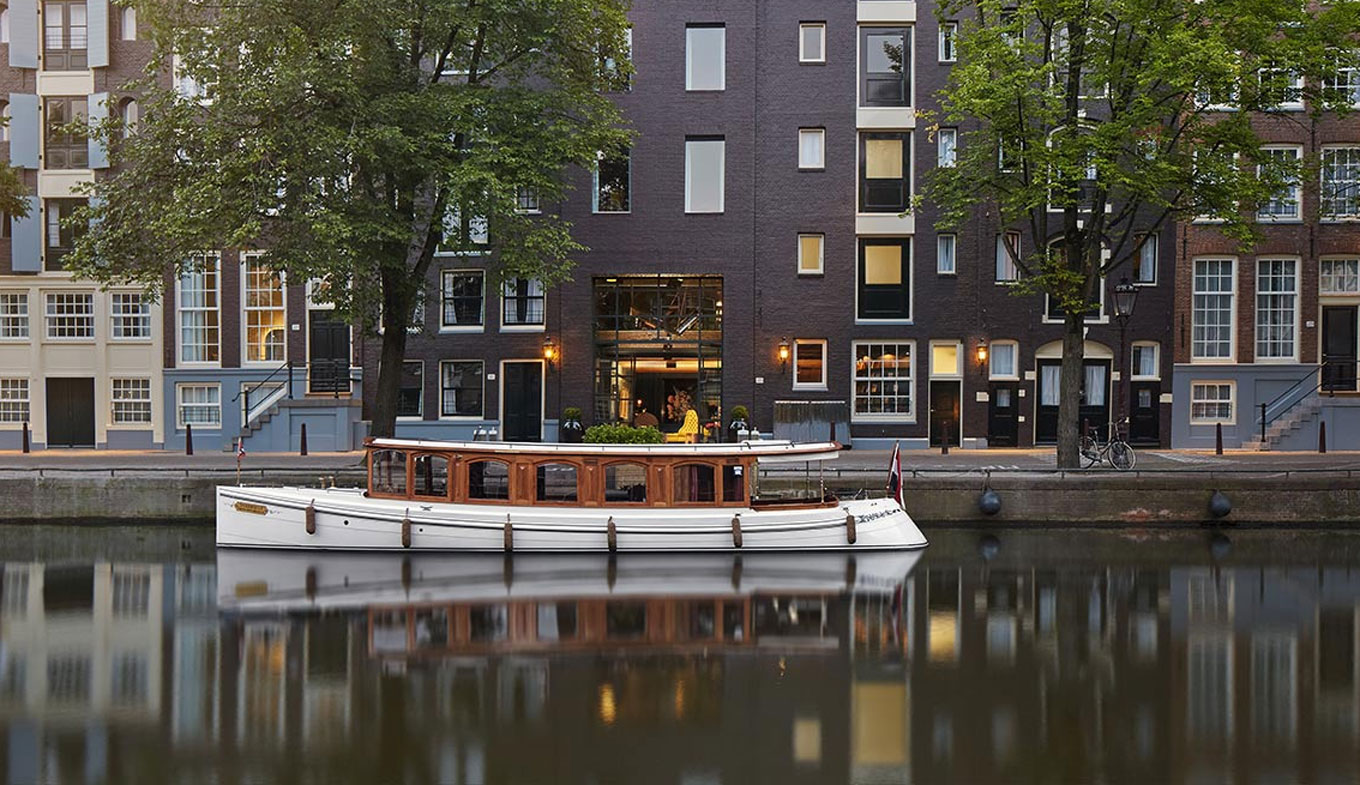

In [19]:
from IPython.display import Image
Image("68467_fullimage_amsterdam_canal2_1360x.jpg",width=1000,height=1000)

In [20]:
Amsterdam = Destination[Destination['City'] == 'Amsterdam'] 

In [21]:
Amsterdam.head()

,City,Latitude,Longitude,Name_of_place,categorization
0,Amsterdam,52.356347,4.997105,Kos,Hotel
1,Amsterdam,52.355473708753,4.9932861328125,Hawaijburg,Resort
2,Amsterdam,52.382517,4.791104,Perfect House In Amsterdam!,Bed & Breakfast
3,Amsterdam,52.350272159742,4.7806079636587,Huize Verel,Resort
4,Amsterdam,52.38013065,4.80258218,d' R.C : Dream Academy,Resort


In [22]:
Amsterdam.categorization.unique()

array(['Hotel', 'Resort', 'Bed & Breakfast', 'Home (private)', 'Hostel',
       'Roof Deck', 'Travel & Transport', 'Strip Club', 'Bike Shop',
       'Tech Startup', 'Gas Station / Garage', 'Travel Agency', 'Motel',
       'Flea Market', 'River', 'Bridge', 'Boarding House', 'Playground',
       'Residential Building (Apartment / Condo)', 'Office', 'Parking',
       'Other Great Outdoors', 'Park', 'Neighborhood', 'Pool',
       'Surf Spot', 'Garden', 'Island', 'Beer Garden', 'Scenic Lookout',
       'Athletics & Sports', 'Arcade', 'Field', 'Harbor / Marina',
       'Dance Studio', 'Soccer Field', 'General Entertainment', 'Lake',
       'Public Art', 'Beach', 'Theme Park', 'Bar', 'Music Venue',
       'Lounge', 'Golf Course', 'Dive Bar', 'Farm', 'Nightclub',
       'Dog Run', 'Trail', 'Campground', 'Stables',
       'Arts & Entertainment', 'Outdoors & Recreation', 'Cemetery', 'Zoo',
       'Plaza', 'Soccer Stadium', 'Sculpture Garden', 'Stadium',
       'Brewery', 'Comedy Club', 'Pool Hal

## LETS CHOOSE WHERE WE WOULD LIKE TO GO 

In [23]:
Amsterdam = (Amsterdam.loc[Amsterdam['categorization'].isin(['Hotel',
                                                             'Art Museum'
                                                             ,'Taxi'
                                                             ,'Golf Course'
                                                             ,'Bank'
                                                             ,'Greek Restaurant'
                                                             ,'Church'
                                                             ,'Hospital' ])])

In [24]:
Amsterdam.head()

,City,Latitude,Longitude,Name_of_place,categorization
0,Amsterdam,52.356347,4.997105,Kos,Hotel
16,Amsterdam,52.390759,4.837317,Meininger Room 115,Hotel
17,Amsterdam,52.3865541171,4.8412464024229,Holiday Inn Sloterdik,Hotel
19,Amsterdam,52.363088177288,4.8424416324216,Fasion Hotel,Hotel
20,Amsterdam,52.348997187115,4.8426260401684,HEM Hotel,Hotel


In [25]:
Amsterdam.categorization.unique()

array(['Hotel', 'Golf Course', 'Art Museum', 'Church', 'Taxi', 'Hospital',
       'Greek Restaurant', 'Bank'], dtype=object)

In [26]:
Amsterdam.head()

,City,Latitude,Longitude,Name_of_place,categorization
0,Amsterdam,52.356347,4.997105,Kos,Hotel
16,Amsterdam,52.390759,4.837317,Meininger Room 115,Hotel
17,Amsterdam,52.3865541171,4.8412464024229,Holiday Inn Sloterdik,Hotel
19,Amsterdam,52.363088177288,4.8424416324216,Fasion Hotel,Hotel
20,Amsterdam,52.348997187115,4.8426260401684,HEM Hotel,Hotel


In [27]:
## LETS GET SOME COLOUR TOGETHER 
def citycolors(df):
    if df['categorization'] == 'Hotel':
        return 'red'
    elif df['categorization'] == 'Art Museum':
        return 'blue'
    elif df['categorization'] == 'Taxi':
        return 'green'
    elif df['categorization'] == 'Golf Course':
        return 'purple'
    elif df['categorization'] == 'Bank':
        return 'beige'
    elif df['categorization'] == 'Greek Restaurant':
        return 'orange'
    elif df['categorization'] == 'Church':
        return 'white'
    else:
        return 'pink'

In [28]:
Amsterdam["color"] = Amsterdam.apply(citycolors, axis=1)
Amsterdam.head()

,City,Latitude,Longitude,Name_of_place,categorization,color
0,Amsterdam,52.356347,4.997105,Kos,Hotel,red
16,Amsterdam,52.390759,4.837317,Meininger Room 115,Hotel,red
17,Amsterdam,52.3865541171,4.8412464024229,Holiday Inn Sloterdik,Hotel,red
19,Amsterdam,52.363088177288,4.8424416324216,Fasion Hotel,Hotel,red
20,Amsterdam,52.348997187115,4.8426260401684,HEM Hotel,Hotel,red


In [29]:
from folium.plugins import MarkerCluster
MarkerCluster()

In [30]:
locations = Amsterdam[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

['52.392751960469', '4.8685943205015']

## HERE IS OUR MAP 

In [31]:
Amsterdam_Map = folium.Map(location=[52.3,  4.8], tiles='CartoDB dark_matter', zoom_start=11)
marker_cluster = MarkerCluster().add_to(Amsterdam_Map)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=Amsterdam['Name_of_place']).add_to(marker_cluster)
Amsterdam_Map

## PLEASE FEEL FREE TO EXPAND ON WHAT I HAVE DONE AND ENJOY THE NOTEBOOK 